# EDA: Question bank and user answers

This notebook explores the two datasets described in `data/README.text`:

- **Table 1 – Question metadata** (`ds_test_case_qbank_questions.csv`): categorical data and metadata for each assessment item (academic standards, clinical areas, difficulty).
- **Table 2 – User performance** (`ds_test_case_user_answers.csv`): transaction log of user responses (who answered what, correctness, points, timestamp).

We follow the metadata description step by step for both tables.

In [3]:
import pandas as pd
from pathlib import Path

%matplotlib inline
DATA_DIR = Path("../data")
QBANK_PATH = DATA_DIR / "ds_test_case_qbank_questions.csv"
ANSWERS_PATH = DATA_DIR / "ds_test_case_user_answers.csv"

# Load both datasets
qbank = pd.read_csv(QBANK_PATH)
answers = pd.read_csv(ANSWERS_PATH)

print("Table 1 (Question metadata) shape:", qbank.shape)
print("Table 2 (User answers) shape:", answers.shape)

Table 1 (Question metadata) shape: (58853, 8)
Table 2 (User answers) shape: (8499, 6)


## Table 1: Question metadata (`ds_test_case_qbank_questions.csv`)

**Description:** Categorical data and metadata for each assessment item. Maps questions to academic standards, clinical areas, and difficulty levels.

**Columns (from README):**
- `question_id`: Unique identifier for each assessment item.
- `type`: Format of the question (e.g. "MC: single choice").
- `points`: Maximum point value for the question.
- `difficulty`: Perceived complexity (e.g. "Medium").
- `question_group`: Grouping for related questions (case study). Null = stand-alone.
- `category`: Framework/taxonomy (e.g. Bloom's Taxonomy, Client Needs, Body System).
- `term`: Specific label/competency within the category (e.g. "Medical-Surgical", "Apply").
- `parent_term`: Broader classification for the term (e.g. "Physiological Integrity").

In [4]:
# Table 1: Basic info and missing values
print("Dtypes:\n", qbank.dtypes)
print("\nMissing values:\n", qbank.isna().sum())
print("\nFirst rows:")
qbank.head(10)

Dtypes:
 question_id         str
type                str
points            int64
difficulty          str
question_group      str
category            str
term                str
parent_term         str
dtype: object

Missing values:
 question_id           0
type                  0
points                0
difficulty            0
question_group    47291
category              0
term                  0
parent_term       50339
dtype: int64

First rows:


,question_id,type,points,difficulty,question_group,category,term,parent_term
0,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,AACN Essentials,2.8c Educate individuals and families regardin...,2.8 Promote self-care management.
1,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,BSN Essentials,Basic Organizational and Systems Leadership fo...,NaN
2,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,Bloom's Taxonomy,Apply,NaN
3,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,Body System,Nervous/Sensory,NaN
4,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,Client Needs,Reduction of Risk Potential,Physiological Integrity
5,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,Clinical Area,Medical-Surgical,NaN
6,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,Concept,Patient Education,NaN
7,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,Integrated Processes,Teaching/Learning,NaN
8,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,Nursing Process,Implementation,NaN
9,347f766ab6285edaea44387df3a82c03,MC: single choice,1,Medium,NaN,QSEN Competency,Safety,NaN


In [5]:
# One question_id can have multiple rows (one per category/term tagging)
n_rows = len(qbank)
n_unique_questions = qbank["question_id"].nunique()
print(f"Rows: {n_rows}, Unique question_id: {n_unique_questions}")
print(f"Avg tags per question: {n_rows / n_unique_questions:.1f}")
qbank["question_id"].value_counts().head(10)

Rows: 58853, Unique question_id: 4842
Avg tags per question: 12.2


question_id
ca7a5bb73c2f72cf88238ac1159a19e8    13
84a952b6c425a60bc08777995180fc55    13
74f822eb038925a4a36daf6e300d71c2    13
15611dd27a27e10510d311505b1def6e    13
e8e1f3dad3bd64e13772333b5daf706c    13
e2cb396b4270c15f04b8fe94d698bfe1    13
d5c1736fff0f16eeff1aa782c7b5057c    13
1578aaffb3e3e17994e510bf08ad1994    13
f5c96296bdbb821fc4bc977127f12490    13
c3cb2f31a755915e523694039a205a6f    13
Name: count, dtype: int64

In [6]:
# question_id, type, points, difficulty (per-question attributes; take first row per question)
q_per_question = qbank.drop_duplicates(subset="question_id", keep="first")
print("type (question format):")
print(q_per_question["type"].value_counts())
print("\npoints:")
print(q_per_question["points"].value_counts().sort_index())
print("\ndifficulty:")
print(q_per_question["difficulty"].value_counts())

type (question format):
type
MC: single choice                                     2530
MC_SATA: multiple choice - select all that apply      1590
MC_MG: multiple choice - matrix grid                   189
SA_B: stand alone - bowtie                              76
MR_MG: multipe response - matrix grid                   76
DD_C: drop-down - cloze                                 73
DD_R: drop-down - rationale                             67
MR_SN: multiple response - select N                     64
HTXT_SATA: highlight text - select all that apply       52
DAD_C: drag & drop - cloze                              28
MR_G: multiple response - grouping                      28
DAD_R: drag & drop - rationale                          19
HTBL_SATA: highlight table - select all that apply      16
HTXT_SN: highlight text - select N                      14
DAD_E: drag & drop - extended                           10
DAD_OR: drag & drop - ordered response                   9
HTBL_SN: highlight table - 

In [7]:
# question_group: null = stand-alone; non-null = part of a case study
print("question_group (non-null = grouped/case study):")
print(qbank["question_group"].notna().value_counts())
print("\nSample of non-null question_group:")
print(qbank[qbank["question_group"].notna()]["question_group"].head())

question_group (non-null = grouped/case study):
question_group
False    47291
True     11562
Name: count, dtype: int64

Sample of non-null question_group:
40080    Growth &#038; Development: Young adult
40081    Growth &#038; Development: Young adult
40082    Growth &#038; Development: Young adult
40083    Growth &#038; Development: Young adult
40084    Growth &#038; Development: Young adult
Name: question_group, dtype: str


In [8]:
# category: framework/taxonomy
print("category (count of tag rows):")
print(qbank["category"].value_counts())

category (count of tag rows):
category
AACN Essentials            4842
BSN Essentials             4842
Bloom's Taxonomy           4842
Body System                4842
Clinical Area              4842
Concept                    4842
Integrated Processes       4842
Nursing Process            4842
QSEN Competency            4842
Subject                    4842
System                     4842
Client Needs               4841
Clinical Judgment Model     750
Name: count, dtype: int64


In [9]:
# term: specific label within category (sample per category)
print("Sample terms per category:")
for cat in qbank["category"].unique()[:5]:
    terms = qbank[qbank["category"] == cat]["term"].dropna().unique()[:3]
    print(f"  {cat}: {list(terms)}")
print("\nparent_term (sample):")
print(qbank["parent_term"].dropna().unique()[:10])

Sample terms per category:
  AACN Essentials: ['2.8c Educate individuals and families regarding self-care for health promotion, illness prevention, and illness management.', '2.3c Perform a clinically relevant, holistic health assessment.', '2.9d Recognize when additional expertise and knowledge is needed to manage the patient.']
  BSN Essentials: ['Basic Organizational and Systems Leadership for Quality Care and Patient Safety', 'Baccalaureate Generalist Nursing Practice', 'Interprofessional Communication and Collaboration for Improving Patient Health Outcomes']
  Bloom's Taxonomy: ['Apply', 'Analyze', 'Evaluate']
  Body System: ['Nervous/Sensory', 'Null', 'Gastrointestinal']
  Client Needs: ['Reduction of Risk Potential', 'Management of Care', 'Psychosocial Integrity']

parent_term (sample):
<StringArray>
[                                             '2.8 Promote self-care management.',
                                                        'Physiological Integrity',
               

## Table 2: User performance (`ds_test_case_user_answers.csv`)

**Description:** Transaction log of user responses. Tracks how users interacted with questions and whether they earned credit.

**Columns (from README):**
- `user_id`: Unique identifier for the student/examinee.
- `question_id`: Question answered (joins with metadata table).
- `is_correct`: Binary success for the entire question (1 = correct, 0 = incorrect).
- `earned_points`: Points awarded for the response.
- `total_points`: Maximum points for that question.
- `created_at`: ISO 8601 timestamp (YYYY-MM-DDTHH:MM:SS) when the answer was submitted.

In [10]:
# Table 2: Basic info and missing values
print("Dtypes:\n", answers.dtypes)
print("\nMissing values:\n", answers.isna().sum())
print("\nFirst rows:")
answers.head(10)

Dtypes:
 user_id            str
question_id        str
is_correct       int64
earned_points    int64
total_points     int64
created_at         str
dtype: object

Missing values:
 user_id          0
question_id      0
is_correct       0
earned_points    0
total_points     0
created_at       0
dtype: int64

First rows:


,user_id,question_id,is_correct,earned_points,total_points,created_at
0,ca9ebeb725afe91fab7011d76f83e17a,e2c09c21c6af78f70b433bad9215505c,1,1,1,2024-05-20T02:16:21Z
1,ca9ebeb725afe91fab7011d76f83e17a,1ef27b7d119de24c6f51b31dca796c2a,1,1,1,2024-05-20T02:16:21Z
2,ca9ebeb725afe91fab7011d76f83e17a,35ebab417b934ed5fb4874c3e4ea32b9,1,1,1,2024-05-20T02:16:21Z
3,ca9ebeb725afe91fab7011d76f83e17a,7d87e214d7a99d821316c2c230d044c8,0,0,1,2024-05-20T02:16:21Z
4,ca9ebeb725afe91fab7011d76f83e17a,c25da56e68b9f09ed28d5f40897f9262,0,0,1,2024-05-20T02:16:21Z
5,ca9ebeb725afe91fab7011d76f83e17a,95d97b6add2385af451f99e41a4703c8,1,1,1,2024-05-20T02:16:21Z
6,ca9ebeb725afe91fab7011d76f83e17a,28ce87707a780adcde101ccf5b4e907c,1,1,1,2024-05-20T02:16:21Z
7,ca9ebeb725afe91fab7011d76f83e17a,cf0198d2a2dd06fdc4ff1709d776d046,0,0,1,2024-05-20T02:16:21Z
8,ca9ebeb725afe91fab7011d76f83e17a,1c9f8448061aebb6cabf557c8d3c3951,1,1,1,2024-05-20T02:16:21Z
9,ca9ebeb725afe91fab7011d76f83e17a,11abc3892712ae3781aad8a6d4834158,1,1,1,2024-05-20T02:16:21Z


In [11]:
# Parse timestamp
answers["created_at"] = pd.to_datetime(answers["created_at"], utc=True)
print("created_at range:", answers["created_at"].min(), "to", answers["created_at"].max())
print("\nuser_id count:", answers["user_id"].nunique())
print("question_id count (in answers):", answers["question_id"].nunique())
print("Total answer records:", len(answers))

created_at range: 2024-05-19 18:30:11+00:00 to 2026-01-17 19:24:02+00:00

user_id count: 5
question_id count (in answers): 3920
Total answer records: 8499


In [12]:
# is_correct: binary success
print("is_correct distribution:")
print(answers["is_correct"].value_counts())
print("\nOverall correctness rate:", answers["is_correct"].mean())

is_correct distribution:
is_correct
0    4456
1    4043
Name: count, dtype: int64

Overall correctness rate: 0.47570302388516295


In [13]:
# earned_points and total_points (partial credit possible in principle)
print("earned_points value counts:")
print(answers["earned_points"].value_counts().sort_index())
print("\ntotal_points value counts:")
print(answers["total_points"].value_counts().sort_index())
# Derived correctness ratio (should match is_correct when total_points > 0)
answers["correctness_ratio"] = answers["earned_points"] / answers["total_points"].replace(0, 1)
print("\nCorrectness ratio (earned/total) - sample:")
print(answers[["is_correct", "earned_points", "total_points", "correctness_ratio"]].head(10))

earned_points value counts:
earned_points
0     2567
1     3717
2      855
3      768
4      318
5      128
6       58
7       33
8       15
9       10
10       6
11       9
12       4
13       5
14       3
15       3
Name: count, dtype: int64

total_points value counts:
total_points
1     5042
2      807
3     1317
4      680
5      287
6      136
7       81
8       36
9       25
10      15
11       9
12      14
13      22
14       9
15       9
16       2
17       1
18       3
19       3
20       1
Name: count, dtype: int64

Correctness ratio (earned/total) - sample:
   is_correct  earned_points  total_points  correctness_ratio
0           1              1             1                1.0
1           1              1             1                1.0
2           1              1             1                1.0
3           0              0             1                0.0
4           0              0             1                0.0
5           1              1             1           

In [14]:
# Activity per user (answers per user)
answers_per_user = answers.groupby("user_id").agg(
    n_answers=("question_id", "count"),
    n_correct=("is_correct", "sum"),
    first_ts=("created_at", "min"),
    last_ts=("created_at", "max"),
)
answers_per_user["correctness_rate"] = answers_per_user["n_correct"] / answers_per_user["n_answers"]
print("Answers per user (summary):")
print(answers_per_user["n_answers"].describe())
print("\nCorrectness rate per user (summary):")
print(answers_per_user["correctness_rate"].describe())
answers_per_user.head(10)

Answers per user (summary):
count       5.000000
mean     1699.800000
std      1129.851849
min       598.000000
25%       842.000000
50%      1516.000000
75%      2129.000000
max      3414.000000
Name: n_answers, dtype: float64

Correctness rate per user (summary):
count    5.000000
mean     0.515730
std      0.128917
min      0.323667
25%      0.466746
50%      0.556856
75%      0.563175
max      0.668206
Name: correctness_rate, dtype: float64


,n_answers,n_correct,first_ts,last_ts,correctness_rate
user_id,,,,,
09fcac827c456245b776d3805f98b3a1,2129,1199,2025-12-18 23:59:03+00:00,2026-01-12 07:40:48+00:00,0.563175
23216c13d92d0d73f2e7e5c5768b7d7f,3414,1105,2024-07-19 04:27:08+00:00,2024-10-26 01:30:42+00:00,0.323667
4114709ccce78fee32cbd65948e19fa8,842,393,2024-10-22 08:53:05+00:00,2025-01-21 02:45:06+00:00,0.466746
7d4f20c35be78889033bf5ebba3f1613,1516,1013,2024-09-02 18:55:38+00:00,2026-01-17 19:24:02+00:00,0.668206
ca9ebeb725afe91fab7011d76f83e17a,598,333,2024-05-19 18:30:11+00:00,2024-05-20 15:50:47+00:00,0.556856


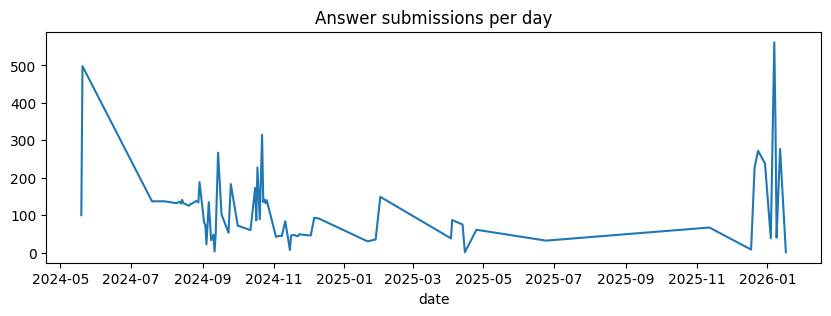

In [15]:
# Activity over time (answers per day)
answers["date"] = answers["created_at"].dt.date
daily = answers.groupby("date").size()
daily.plot(title="Answer submissions per day", figsize=(10, 3));

## Join: Questions and answers

How many answered questions exist in the question bank? Overlap of users and questions.

In [16]:
# Questions in the bank vs questions that were answered
q_ids_bank = set(qbank["question_id"].unique())
q_ids_answered = set(answers["question_id"].unique())
in_both = q_ids_bank & q_ids_answered
only_bank = q_ids_bank - q_ids_answered
only_answered = q_ids_answered - q_ids_bank

print("Unique questions in bank:", len(q_ids_bank))
print("Unique questions in answers:", len(q_ids_answered))
print("In both (answered and in bank):", len(in_both))
print("In bank but never answered:", len(only_bank))
print("In answers but not in bank:", len(only_answered))
if only_answered:
    print("\nSample question_id in answers but not in bank:", list(only_answered)[:3])

Unique questions in bank: 4842
Unique questions in answers: 3920
In both (answered and in bank): 3920
In bank but never answered: 922
In answers but not in bank: 0


In [17]:
# Merge: attach question metadata to answers (one row per answer; pick one category row per question if needed)
# Use first occurrence of each question from qbank for type, points, difficulty
q_meta = qbank.drop_duplicates(subset="question_id", keep="first")[["question_id", "type", "points", "difficulty"]]
merged = answers.merge(q_meta, on="question_id", how="left")
print("Merged shape:", merged.shape)
print("Answers with matching question in bank:", merged["type"].notna().sum())
merged[["user_id", "question_id", "is_correct", "earned_points", "total_points", "type", "points", "difficulty"]].head(10)

Merged shape: (8499, 11)
Answers with matching question in bank: 8499


,user_id,question_id,is_correct,earned_points,total_points,type,points,difficulty
0,ca9ebeb725afe91fab7011d76f83e17a,e2c09c21c6af78f70b433bad9215505c,1,1,1,MC: single choice,1,Hard
1,ca9ebeb725afe91fab7011d76f83e17a,1ef27b7d119de24c6f51b31dca796c2a,1,1,1,MC_SATA: multiple choice - select all that apply,3,Hard
2,ca9ebeb725afe91fab7011d76f83e17a,35ebab417b934ed5fb4874c3e4ea32b9,1,1,1,MC: single choice,1,Easy
3,ca9ebeb725afe91fab7011d76f83e17a,7d87e214d7a99d821316c2c230d044c8,0,0,1,MC: single choice,1,Medium
4,ca9ebeb725afe91fab7011d76f83e17a,c25da56e68b9f09ed28d5f40897f9262,0,0,1,MC: single choice,1,Easy
5,ca9ebeb725afe91fab7011d76f83e17a,95d97b6add2385af451f99e41a4703c8,1,1,1,MC: single choice,1,Easy
6,ca9ebeb725afe91fab7011d76f83e17a,28ce87707a780adcde101ccf5b4e907c,1,1,1,MC: single choice,1,Medium
7,ca9ebeb725afe91fab7011d76f83e17a,cf0198d2a2dd06fdc4ff1709d776d046,0,0,1,MC: single choice,1,Medium
8,ca9ebeb725afe91fab7011d76f83e17a,1c9f8448061aebb6cabf557c8d3c3951,1,1,1,MC: single choice,1,Medium
9,ca9ebeb725afe91fab7011d76f83e17a,11abc3892712ae3781aad8a6d4834158,1,1,1,MC: single choice,1,Medium


### What the outputs above mean

- **Table 1 (58,853 rows):** Each row is a *tag*: one (question, category, term) pair. So one question has many rows (one per taxonomy dimension). `question_group` and `parent_term` are often missing; use `category` and `term` for concepts.
- **Table 2 (8,499 rows):** One row per (user, question) answer. `is_correct` is 0/1; `earned_points/total_points` gives partial credit when needed. No missing values.
- **Join:** Some answered `question_id`s may not be in the qbank (different scope); merge on `question_id` to attach type, points, difficulty and (for state) category/term from the bank.

## EDA for recommender system

The recommender suggests the **next best question(s)** for a user. Below we analyse:

1. **Sparsity** – User–item matrix: how many (user, question) pairs exist vs possible. High sparsity favours content/state-based or hybrid approaches.
2. **Cold-start** – Users with very few answers and questions with very few answers; we need fallbacks (e.g. popular items, difficulty-based).
3. **State dimensions** – Which metadata (category, term, difficulty) to use for “student state” and for filtering candidates; cardinality and coverage.
4. **Target** – Use `is_correct` (binary) or `earned_points/total_points` (partial credit) for ML.
5. **Temporal split** – Date range and ordering for train/test so we don’t leak future into past.

In [18]:
# 1. Sparsity: user–item matrix
# Possible interactions = n_users × n_questions (in the answer set); observed = len(answers)
n_users = answers["user_id"].nunique()
n_questions_in_answers = answers["question_id"].nunique()
n_interactions = len(answers)
possible = n_users * n_questions_in_answers  # upper bound if every user could answer every question
# More realistic: only questions that appear in answers (catalog)
sparsity = 1 - (n_interactions / possible) if possible > 0 else 0
print("User–item (answers) matrix:")
print(f"  Users: {n_users}, Questions (in answers): {n_questions_in_answers}")
print(f"  Observed interactions: {n_interactions}")
print(f"  Possible (users × questions): {possible:,}")
print(f"  Sparsity (1 - density): {sparsity:.4f} ({sparsity*100:.2f}% empty)")
print("\n→ Very sparse: recommenders should use metadata (category, term, difficulty) and state, not only collaborative filtering.")

User–item (answers) matrix:
  Users: 5, Questions (in answers): 3920
  Observed interactions: 8499
  Possible (users × questions): 19,600
  Sparsity (1 - density): 0.5664 (56.64% empty)

→ Very sparse: recommenders should use metadata (category, term, difficulty) and state, not only collaborative filtering.


Answers per user:
count       5.000000
mean     1699.800000
std      1129.851849
min       598.000000
25%       842.000000
50%      1516.000000
75%      2129.000000
max      3414.000000
dtype: float64

Users with 1–5 answers (cold-start risk): 0 / 5
Users with 1–10 answers: 0 / 5

Answers per question (in answer set):
count    3920.000000
mean        2.168112
std         1.451453
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
dtype: float64

Questions answered only 1–3 times (cold-start for item): 3366 / 3920


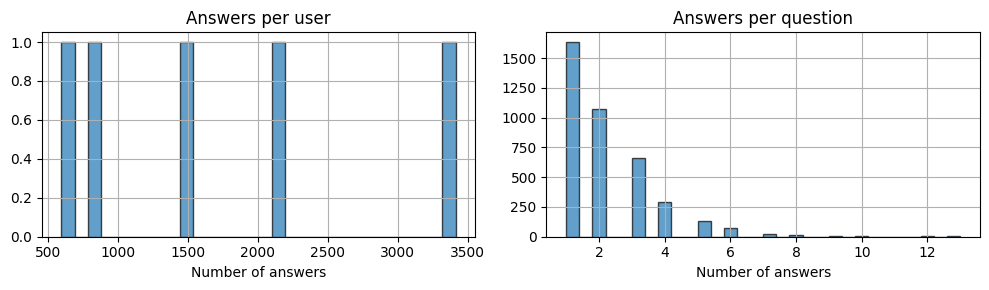


→ Many users have few answers: need cold-start strategy (e.g. difficulty-based or popular).


In [19]:
# 2. Cold-start: distribution of activity per user and per question
import matplotlib.pyplot as plt
answers["created_at"] = pd.to_datetime(answers["created_at"], utc=True)
per_user = answers.groupby("user_id").size()
per_question = answers.groupby("question_id").size()

print("Answers per user:")
print(per_user.describe())
print(f"\nUsers with 1–5 answers (cold-start risk): {(per_user <= 5).sum()} / {len(per_user)}")
print(f"Users with 1–10 answers: {(per_user <= 10).sum()} / {len(per_user)}")

print("\nAnswers per question (in answer set):")
print(per_question.describe())
print(f"\nQuestions answered only 1–3 times (cold-start for item): {(per_question <= 3).sum()} / {len(per_question)}")

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
per_user.hist(bins=30, ax=ax[0], edgecolor="black", alpha=0.7)
ax[0].set_title("Answers per user")
ax[0].set_xlabel("Number of answers")
per_question.hist(bins=30, ax=ax[1], edgecolor="black", alpha=0.7)
ax[1].set_title("Answers per question")
ax[1].set_xlabel("Number of answers")
plt.tight_layout()
plt.show()
print("\n→ Many users have few answers: need cold-start strategy (e.g. difficulty-based or popular).")

In [20]:
# 3. State dimensions: which metadata to use for "student state" and filtering
# Questions in answers: do they have metadata in qbank?
q_ids_bank = set(qbank["question_id"].unique())
q_ids_answered = set(answers["question_id"].unique())
in_both = q_ids_bank & q_ids_answered
print(f"Questions in both qbank and answers: {len(in_both)} (used for state/computing features)")

# For those, get unique categories and difficulty (one row per question)
q_meta = qbank.drop_duplicates(subset="question_id", keep="first")
q_meta_answered = q_meta[q_meta["question_id"].isin(in_both)]
print("\nDifficulty (questions that were answered):")
print(q_meta_answered["difficulty"].value_counts())
print("\nCategory coverage (tag rows): each question has multiple categories")
print(qbank[qbank["question_id"].isin(in_both)]["category"].value_counts())

# Cardinality: useful for KG or rule-based state
print("\nUnique terms per category (answered questions only):")
for cat in ["Clinical Area", "Body System", "Bloom's Taxonomy", "Client Needs"]:
    if cat in qbank["category"].values:
        n_terms = qbank[(qbank["question_id"].isin(in_both)) & (qbank["category"] == cat)]["term"].nunique()
        print(f"  {cat}: {n_terms} unique terms")
print("\n→ Use category + term for 'concept' state; use difficulty for pacing. Parent_term is sparse (many NaN).")

Questions in both qbank and answers: 3920 (used for state/computing features)

Difficulty (questions that were answered):
difficulty
Medium    3660
Hard       157
Easy       103
Name: count, dtype: int64

Category coverage (tag rows): each question has multiple categories
category
AACN Essentials            3920
BSN Essentials             3920
Bloom's Taxonomy           3920
Body System                3920
Clinical Area              3920
Concept                    3920
Integrated Processes       3920
Nursing Process            3920
QSEN Competency            3920
Subject                    3920
System                     3920
Client Needs               3919
Clinical Judgment Model     473
Name: count, dtype: int64

Unique terms per category (answered questions only):
  Clinical Area: 7 unique terms
  Body System: 15 unique terms
  Bloom's Taxonomy: 5 unique terms
  Client Needs: 8 unique terms

→ Use category + term for 'concept' state; use difficulty for pacing. Parent_term is sparse 

In [21]:
# 4. Target for ML: is_correct vs partial credit
print("is_correct (binary):", answers["is_correct"].value_counts().to_dict())
print("Overall correctness:", answers["is_correct"].mean())
# Partial credit: earned_points / total_points
answers["correctness_ratio"] = answers["earned_points"] / answers["total_points"].replace(0, 1)
print("\nearned_points / total_points (correctness_ratio) value counts:")
print(answers["correctness_ratio"].value_counts().sort_index())
print("\n→ In this dataset is_correct matches full credit (0 or 1). Use is_correct for binary target or ratio for regression.")

is_correct (binary): {0: 4456, 1: 4043}
Overall correctness: 0.47570302388516295

earned_points / total_points (correctness_ratio) value counts:
correctness_ratio
0.000000    2567
0.100000       1
0.111111       1
0.125000       1
0.142857       2
0.166667       8
0.200000      22
0.222222       1
0.250000     121
0.285714       5
0.300000       1
0.307692       4
0.315789       1
0.333333     314
0.363636       1
0.375000       7
0.384615       1
0.400000      55
0.416667       2
0.428571      12
0.444444       3
0.461538       3
0.500000     385
0.533333       2
0.538462       1
0.545455       2
0.555556       3
0.571429      20
0.578947       1
0.583333       1
0.600000      73
0.615385       2
0.625000       2
0.642857       2
0.666667     398
0.692308       4
0.700000       4
0.714286      20
0.722222       1
0.727273       2
0.733333       3
0.736842       1
0.750000     235
0.769231       1
0.777778       8
0.785714       1
0.800000      76
0.812500       2
0.818182       3
0.82

In [22]:
# 5. Temporal split: date range and ordering for train/test
ts = answers["created_at"]
print("created_at range:", ts.min(), "to", ts.max())
print("Answers per day (first/last 5 days):")
daily = answers.set_index("created_at").resample("D").size()
print(daily.head())
print("...")
print(daily.tail())
# For train/test: e.g. last 20% by time = test; first 80% = train (per user or global)
answers_sorted = answers.sort_values("created_at")
n = len(answers_sorted)
train_cut = int(0.8 * n)
print(f"\nExample split: first 80% (train) = {train_cut} rows, last 20% (test) = {n - train_cut} rows")
print("→ Sort by created_at when splitting; compute user state only from past interactions.")

created_at range: 2024-05-19 18:30:11+00:00 to 2026-01-17 19:24:02+00:00
Answers per day (first/last 5 days):
created_at
2024-05-19 00:00:00+00:00    100
2024-05-20 00:00:00+00:00    498
2024-05-21 00:00:00+00:00      0
2024-05-22 00:00:00+00:00      0
2024-05-23 00:00:00+00:00      0
Freq: D, dtype: int64
...
created_at
2026-01-13 00:00:00+00:00    0
2026-01-14 00:00:00+00:00    0
2026-01-15 00:00:00+00:00    0
2026-01-16 00:00:00+00:00    0
2026-01-17 00:00:00+00:00    1
Freq: D, dtype: int64

Example split: first 80% (train) = 6799 rows, last 20% (test) = 1700 rows
→ Sort by created_at when splitting; compute user state only from past interactions.


## EDA: Why a knowledge-graph based recommender?

The data has **inherent graph structure**: questions are linked to multiple concepts (categories, terms, parent terms) and to difficulty. Below we show that (1) the schema is naturally a graph, (2) questions share concepts and can be connected via them, (3) hierarchy (term → parent_term) exists for traversal, and (4) a KG supports cold-start and explainable recommendations.

In [24]:
# 1. Multi-relational structure: each question is linked to many entities
# This is exactly what a graph models: (Question)-[:TAGGED_AS]->(Category), (Question)-[:COVERS_TERM]->(Term), etc.
tags_per_question = qbank.groupby("question_id").size()
print("Tags (category-term pairs) per question:")
print(tags_per_question.describe())
print(f"\nEvery question has {tags_per_question.min()} to {tags_per_question.max()} tags → multiple edges per question in a KG.")
print("\nExample: one question's tags (categories + terms):")
sample_q = qbank["question_id"].iloc[0]
print(qbank[qbank["question_id"] == sample_q][["category", "term", "parent_term"]].to_string())
print("\n→ KG nodes: Question, Category, Term, Difficulty, (ParentTerm). Edges: BELONGS_TO_CATEGORY, COVERS_TERM, HAS_DIFFICULTY, PART_OF (term→parent).")

Tags (category-term pairs) per question:
count    4842.000000
mean       12.154688
std         0.362215
min        11.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        13.000000
dtype: float64

Every question has 11 to 13 tags → multiple edges per question in a KG.

Example: one question's tags (categories + terms):
                category                                                                                                                         term                        parent_term
0        AACN Essentials  2.8c Educate individuals and families regarding self-care for health promotion, illness prevention, and illness management.  2.8 Promote self-care management.
1         BSN Essentials                                              Basic Organizational and Systems Leadership for Quality Care and Patient Safety                                NaN
2       Bloom's Taxonomy                                                                        

In [25]:
# 2. Concept overlap: questions share terms/categories → "related" via graph
# Two questions are related if they share a term (or category). A KG lets us traverse: Question → Term ← Question.
term_to_questions = qbank.groupby("term")["question_id"].apply(set).to_dict()
# How many questions share at least one term with another question?
from collections import defaultdict
term_counts = qbank.groupby("term")["question_id"].nunique()
print("Questions per term (terms that link multiple questions enable 'related question' recommendations):")
print(term_counts[term_counts > 1].describe())
print(f"\nTerms that appear in more than one question: {(term_counts > 1).sum()} / {len(term_counts)}")
print("Sample terms with multiple questions:", term_counts[term_counts > 1].head(10).to_dict())
print("\n→ In a KG, 'recommend questions that share a weak term' or 'same category, different term' are natural traversals.")

Questions per term (terms that link multiple questions enable 'related question' recommendations):
count     340.000000
mean      167.067647
std       412.301210
min         2.000000
25%         4.000000
50%        20.000000
75%       125.000000
max      3417.000000
Name: question_id, dtype: float64

Terms that appear in more than one question: 340 / 385
Sample terms with multiple questions: {'1.1a Identify concepts, derived from theories from nursing and other disciplines, which distinguish the practice of nursing.': 8, '1.1b Apply knowledge of nursing science that develops a foundation for nursing practice.': 37, '1.1d Articulate nursing’s distinct perspective to practice.': 6, '1.2a Apply or employ knowledge from nursing science as well as the natural, physical, and social sciences to build an understanding of the human experience and nursing practice.': 410, '1.2b Demonstrate intellectual curiosity.': 27, '1.3a Demonstrate clinical reasoning.': 73, '1.3b Integrate nursing knowledge

In [26]:
# 3. Hierarchy: Term → parent_term (where present) supports "broader concept" reasoning
has_parent = qbank["parent_term"].notna() & (qbank["parent_term"].str.strip() != "")
print("Tag rows with a non-null parent_term:", has_parent.sum(), "/", len(qbank))
parent_terms = qbank.loc[has_parent, ["term", "parent_term"]].drop_duplicates()
print("\nSample hierarchy (term → parent_term):")
print(parent_terms.head(15).to_string())
print("\nUnique (term, parent_term) pairs:", len(parent_terms))
print("\n→ KG edge (Term)-[:PART_OF]->(ParentTerm) allows 'recommend questions in same broader concept' or curriculum structure.")

Tag rows with a non-null parent_term: 8514 / 58853

Sample hierarchy (term → parent_term):
                                                                                                                            term                                                                     parent_term
0    2.8c Educate individuals and families regarding self-care for health promotion, illness prevention, and illness management.                                               2.8 Promote self-care management.
4                                                                                                    Reduction of Risk Potential                                                         Physiological Integrity
12                                                               2.3c Perform a clinically relevant, holistic health assessment.                                    2.3 Integrate assessment skills in practice.
24                                       2.9d Recognize when additional e

In [27]:
# 4. Sparsity + metadata coverage: KG fills the gap when interactions are missing
# We have few (user, question) pairs but rich metadata for every question → recommend by "concept" not only by "users like you".
n_questions_bank = qbank["question_id"].nunique()
n_questions_answered = answers["question_id"].nunique()
n_interactions = len(answers)
coverage = n_questions_answered / n_questions_bank if n_questions_bank else 0
print("Question bank size (unique questions):", n_questions_bank)
print("Questions that appear in at least one answer:", n_questions_answered)
print("Fraction of bank that was ever answered:", f"{coverage:.2%}")
print("\nInteraction matrix: very sparse (shown earlier).")
print("→ Collaborative filtering alone would fail for most (user, question) pairs.")
print("→ KG: we can still recommend by 'questions that cover term X' or 'same difficulty, same category' using only metadata.")

Question bank size (unique questions): 4842
Questions that appear in at least one answer: 3920
Fraction of bank that was ever answered: 80.96%

Interaction matrix: very sparse (shown earlier).
→ Collaborative filtering alone would fail for most (user, question) pairs.
→ KG: we can still recommend by 'questions that cover term X' or 'same difficulty, same category' using only metadata.


In [28]:
# 5. Explainability: recommendations can be grounded in graph paths
# e.g. "Recommended because: same category (Clinical Area) and you need practice on term X."
categories_used = qbank["category"].unique()
print("Categories (interpretable dimensions for explanations):", list(categories_used))
print("\nExample terms per category (human-readable):")
for cat in ["Clinical Area", "Bloom's Taxonomy", "Body System"]:
    terms = qbank[qbank["category"] == cat]["term"].dropna().unique()[:4]
    print(f"  {cat}: {list(terms)}")
print("\n→ KG paths (e.g. User--weak_on-->Term<--COVERS_TERM--Question) give explainable reasons: 'Practice Medical-Surgical' or 'Same body system, different topic'.")

Categories (interpretable dimensions for explanations): ['AACN Essentials', 'BSN Essentials', "Bloom's Taxonomy", 'Body System', 'Client Needs', 'Clinical Area', 'Concept', 'Integrated Processes', 'Nursing Process', 'QSEN Competency', 'Subject', 'System', 'Clinical Judgment Model']

Example terms per category (human-readable):
  Clinical Area: ['Medical-Surgical', 'Leadership', 'Fundamentals', 'Mental Health']
  Bloom's Taxonomy: ['Apply', 'Analyze', 'Evaluate', 'Understand']
  Body System: ['Nervous/Sensory', 'Null', 'Gastrointestinal', 'Respiratory']

→ KG paths (e.g. User--weak_on-->Term<--COVERS_TERM--Question) give explainable reasons: 'Practice Medical-Surgical' or 'Same body system, different topic'.


### Why KG-based recommender: summary

| Observation | Implication for KG |
|-------------|--------------------|
| Each question has many (category, term) tags | Natural graph: Question nodes with edges to Category and Term nodes. |
| Questions share terms/categories | Traversal "same term" or "same category" defines related questions. |
| Term → parent_term hierarchy exists | PART_OF edges support "broader concept" and curriculum-aware recommendations. |
| Interaction matrix is very sparse | CF alone fails; KG allows recommend-by-concept (metadata) and cold-start. |
| Categories/terms are interpretable | Paths in the KG provide explainable reasons (e.g. "weak on term X", "same category"). |

**Conclusion:** The data is naturally a graph (questions ↔ concepts ↔ hierarchy). A knowledge-graph based recommender can use traversals (e.g. weak term → questions covering that term; same category different term) and metadata to suggest next questions and explain why.

In [23]:
# Recommender takeaways (summary)
print("Summary for building the recommender:")
print("  • Sparsity is high → use content/state (category, term, difficulty), not only CF.")
print("  • Cold-start: many users with few answers → fallback to difficulty-based or popular questions.")
print("  • State: use category + term (and optionally parent_term where present) and difficulty from qbank.")
print("  • Target: is_correct (binary) or correctness_ratio; join answers to qbank on question_id for metadata.")
print("  • Split: time-based (e.g. 80/20) so state is computed from past only.")

Summary for building the recommender:
  • Sparsity is high → use content/state (category, term, difficulty), not only CF.
  • Cold-start: many users with few answers → fallback to difficulty-based or popular questions.
  • State: use category + term (and optionally parent_term where present) and difficulty from qbank.
  • Target: is_correct (binary) or correctness_ratio; join answers to qbank on question_id for metadata.
  • Split: time-based (e.g. 80/20) so state is computed from past only.


## Summary

- **Table 1 (qbank):** One row per (question, category, term) tag; multiple rows per question. Use `question_id` + `category`/`term`/`parent_term` for taxonomies; use one row per `question_id` for `type`, `points`, `difficulty`, `question_group`.
- **Table 2 (answers):** One row per (user, question) answer with `is_correct`, points, and `created_at`. Join to qbank on `question_id` for recommender and analysis.
- **Correctness:** Use `is_correct` for binary success; `earned_points/total_points` if partial credit is needed later.